In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

In [7]:
t = np.arange(0, 2000)
X = np.sin(t * 0.01)

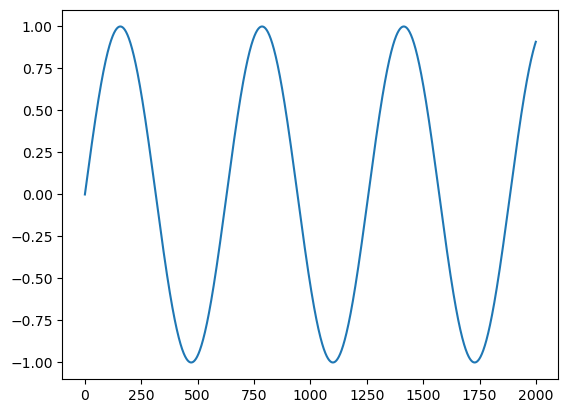

In [8]:
plt.plot(X)

In [9]:
X

array([0.        , 0.00999983, 0.01999867, ..., 0.90029383, 0.90460157,
       0.90881885])

In [10]:
X_train, X_test = X[:1500], X[1500:]

In [12]:
model = Sequential()
model.add(SimpleRNN(units=64, activation='tanh'))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam', loss='mean_absolute_error')

In [14]:
step = 15

In [15]:
XT, yT = [], []
for i in range(len(X_train) - step):
    d = i + step
    XT.append(X_train[i:d,])
    yT.append(X_train[d])
    

In [16]:
Xt, yt = [], []
for i in range(len(X_test) - step):
    d = i + step
    Xt.append(X_test[i:d,])
    yt.append(X_test[d])
    

In [17]:
XT = np.array(XT)
Xt = np.array(Xt)

In [18]:
XT.shape

(1485, 15)

In [19]:
XT = np.reshape(XT, (XT.shape[0], XT.shape[1], 1))
Xt = np.reshape(Xt, (Xt.shape[0], Xt.shape[1], 1))

In [20]:
XT.shape

(1485, 15, 1)

In [21]:
yt = np.array(yt)
yT = np.array(yT)

In [22]:
history = model.fit(XT, yT, epochs=100, batch_size=20)

Epoch 1/100
75/75 [==============================] - 2s 5ms/step - loss: 0.0657
Epoch 2/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0152
Epoch 3/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0104
Epoch 4/100
75/75 [==============================] - 0s 7ms/step - loss: 0.0132
Epoch 5/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0111
Epoch 6/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0104
Epoch 7/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0074
Epoch 8/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0045
Epoch 9/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0077
Epoch 10/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0069
Epoch 11/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 12/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 13/100
75/75 [=================

In [23]:
model.evaluate(Xt, yt)

16/16 [==============================] - 0s 4ms/step - loss: 0.0012


0.0011738345492631197

In [24]:
XT_predicted = model.predict(XT)
Xt_predicted = model.predict(Xt)
X_final = np.concatenate([XT_predicted, Xt_predicted], axis=0)

16/16 [==============================] - 0s 3ms/step


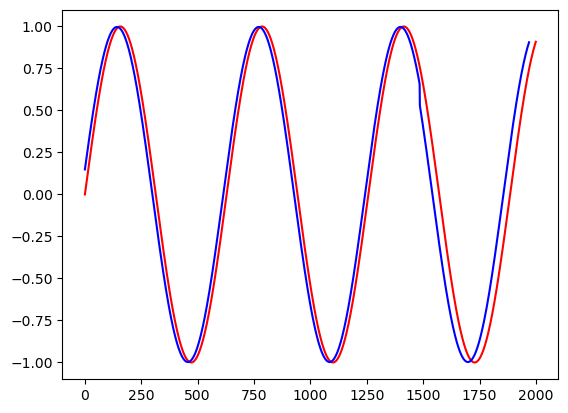

In [25]:
plt.plot(X, color='red')
plt.plot(X_final, color='blue')